In [1]:
import numpy as np
from keras.datasets import imdb, reuters
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

2023-03-08 20:12:21.281510: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-08 20:12:21.581854: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-08 20:12:22.158669: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/bjbae/miniconda3/envs/ml/lib/
2023-03-08 20:12:22.160694: W tensorflow/compiler/xla/stream_

In [2]:
(train_data, train_labels), (test_data,
                             test_labels) = imdb.load_data(num_words=10000)

In [3]:
def vectorize_seqences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

In [4]:
x_train = vectorize_seqences(train_data)
x_test = vectorize_seqences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'])

2023-03-08 20:12:30.133158: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-08 20:12:30.178871: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-08 20:12:30.179296: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-08 20:12:30.179893: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other ope

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                    batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2023-03-08 20:12:36.318723: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-08 20:12:36.329370: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x2252c210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-08 20:12:36.329395: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-03-08 20:12:36.336014: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-08 20:12:36.501379: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-08 20:12:36.551251: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once f

30/30 [==============================] - 4s 37ms/step - loss: 0.5660 - accuracy: 0.7455 - val_loss: 0.4331 - val_accuracy: 0.8637
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3519 - accuracy: 0.8867 - val_loss: 0.3510 - val_accuracy: 0.8630
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2586 - accuracy: 0.9151 - val_loss: 0.2897 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2033 - accuracy: 0.9346 - val_loss: 0.2755 - val_accuracy: 0.8886
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1717 - accuracy: 0.9455 - val_loss: 0.2905 - val_accuracy: 0.8811
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1441 - accuracy: 0.9545 - val_loss: 0.2977 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1224 - accuracy: 0.9632 - val_loss: 0.3107 - val_accuracy: 0.8781
Epoch 8/20
30/30 [======

In [8]:
history_dict = history.history
print(history_dict.keys())

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


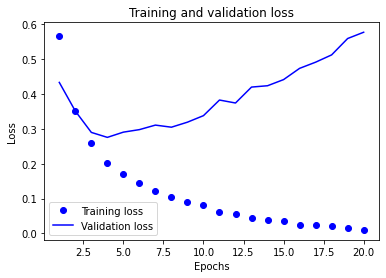

In [9]:
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("images/movies/original.png", dpi=1200, bbox_inches="tight")

plt.show()

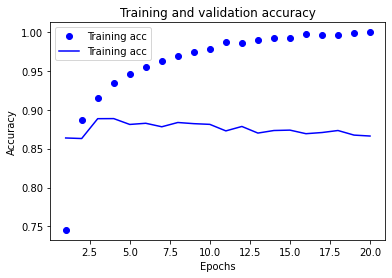

In [10]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Training acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Further Experiments

Try using larger or smaller layers: 32 units, 128 units and so on

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                    batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5280 - accuracy: 0.7801 - val_loss: 0.4121 - val_accuracy: 0.8587
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3421 - accuracy: 0.8933 - val_loss: 0.3315 - val_accuracy: 0.8840
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2700 - accuracy: 0.9157 - val_loss: 0.3003 - val_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2269 - accuracy: 0.9288 - val_loss: 0.2921 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1988 - accuracy: 0.9365 - val_loss: 0.2867 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1759 - accuracy: 0.9460 - val_loss: 0.2819 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1596 - accuracy: 0.9507 - val_loss: 0.2761 - val_accuracy: 0.8870
Epoch 8/20
30

In [13]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

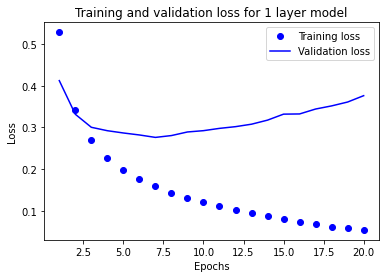

In [14]:
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss for 1 layer model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("images/movies/1.png", dpi=1200, bbox_inches="tight")
plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                    batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5949 - accuracy: 0.6964 - val_loss: 0.4936 - val_accuracy: 0.7951
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3935 - accuracy: 0.8757 - val_loss: 0.3430 - val_accuracy: 0.8823
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2707 - accuracy: 0.9144 - val_loss: 0.3005 - val_accuracy: 0.8842
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2094 - accuracy: 0.9337 - val_loss: 0.2825 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1728 - accuracy: 0.9445 - val_loss: 0.2826 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1436 - accuracy: 0.9545 - val_loss: 0.2944 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1191 - accuracy: 0.9629 - val_loss: 0.3506 - val_accuracy: 0.8687
Epoch 8/20
30

In [17]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

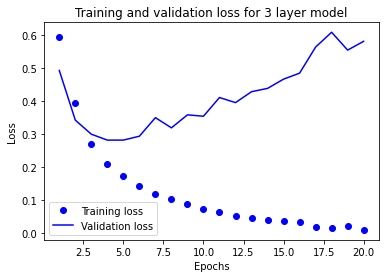

In [18]:
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss for 3 layer model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("images/movies/2.png", dpi=1200, bbox_inches="tight")

plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                    batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5269 - accuracy: 0.7529 - val_loss: 0.3653 - val_accuracy: 0.8689
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3052 - accuracy: 0.8868 - val_loss: 0.3317 - val_accuracy: 0.8629
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2354 - accuracy: 0.9103 - val_loss: 0.3178 - val_accuracy: 0.8722
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1738 - accuracy: 0.9411 - val_loss: 0.2786 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1491 - accuracy: 0.9478 - val_loss: 0.3195 - val_accuracy: 0.8804
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1253 - accuracy: 0.9565 - val_loss: 0.3189 - val_accuracy: 0.8806
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0959 - accuracy: 0.9704 - val_loss: 0.3429 - val_accuracy: 0.8781
Epoch 8/20
30

In [21]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

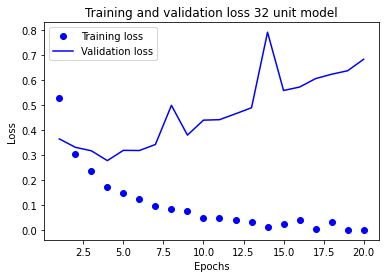

In [22]:
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss 32 unit model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("images/movies/3.png", dpi=1200, bbox_inches="tight")

plt.show()

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                    batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5297 - accuracy: 0.7450 - val_loss: 0.3414 - val_accuracy: 0.8717
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3029 - accuracy: 0.8848 - val_loss: 0.2959 - val_accuracy: 0.8805
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2266 - accuracy: 0.9113 - val_loss: 0.2743 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1783 - accuracy: 0.9356 - val_loss: 0.3331 - val_accuracy: 0.8730
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1320 - accuracy: 0.9513 - val_loss: 0.3381 - val_accuracy: 0.8815
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1143 - accuracy: 0.9582 - val_loss: 0.3421 - val_accuracy: 0.8814
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0839 - accuracy: 0.9730 - val_loss: 0.3579 - val_accuracy: 0.8816
Epoch 8/20
30

In [25]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

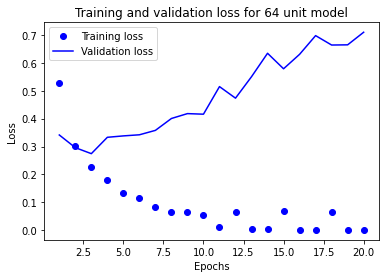

In [26]:
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss for 64 unit model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("images/movies/4.png", dpi=1200, bbox_inches="tight")


plt.show()

In [27]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                    batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5493 - accuracy: 0.7337 - val_loss: 0.3695 - val_accuracy: 0.8581
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3115 - accuracy: 0.8760 - val_loss: 0.3581 - val_accuracy: 0.8560
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2319 - accuracy: 0.9099 - val_loss: 0.3056 - val_accuracy: 0.8770
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1812 - accuracy: 0.9332 - val_loss: 0.2809 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1302 - accuracy: 0.9537 - val_loss: 0.3334 - val_accuracy: 0.8723
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0977 - accuracy: 0.9679 - val_loss: 0.3646 - val_accuracy: 0.8797
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0826 - accuracy: 0.9757 - val_loss: 0.3698 - val_accuracy: 0.8826
Epoch 8/20
30

In [29]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

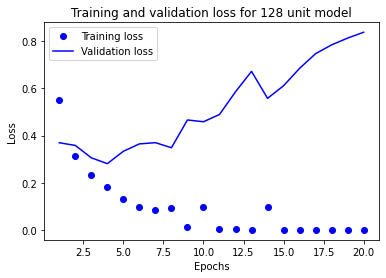

In [30]:
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss for 128 unit model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("images/movies/5.png", dpi=1200, bbox_inches="tight")


plt.show()

In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse',
              metrics=['accuracy'])

In [32]:
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                    batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2022 - accuracy: 0.7165 - val_loss: 0.1378 - val_accuracy: 0.8557
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1100 - accuracy: 0.8806 - val_loss: 0.1012 - val_accuracy: 0.8757
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0768 - accuracy: 0.9121 - val_loss: 0.0868 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0616 - accuracy: 0.9291 - val_loss: 0.0849 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0529 - accuracy: 0.9387 - val_loss: 0.0825 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0435 - accuracy: 0.9515 - val_loss: 0.0976 - val_accuracy: 0.8664
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0371 - accuracy: 0.9617 - val_loss: 0.0854 - val_accuracy: 0.8831
Epoch 8/20
30

In [33]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

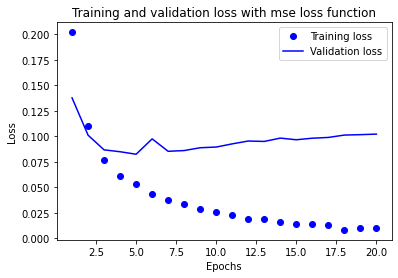

In [34]:
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss with mse loss function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("images/movies/6.png", dpi=1200, bbox_inches="tight")

plt.show()

In [35]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                    batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4813 - accuracy: 0.7788 - val_loss: 0.3429 - val_accuracy: 0.8653
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2667 - accuracy: 0.8985 - val_loss: 0.2755 - val_accuracy: 0.8903
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1911 - accuracy: 0.9296 - val_loss: 0.2901 - val_accuracy: 0.8812
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1504 - accuracy: 0.9473 - val_loss: 0.2969 - val_accuracy: 0.8848
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1237 - accuracy: 0.9574 - val_loss: 0.3257 - val_accuracy: 0.8831
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0940 - accuracy: 0.9688 - val_loss: 0.3835 - val_accuracy: 0.8705
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0765 - accuracy: 0.9757 - val_loss: 0.4434 - val_accuracy: 0.8651
Epoch 8/20
30

In [37]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

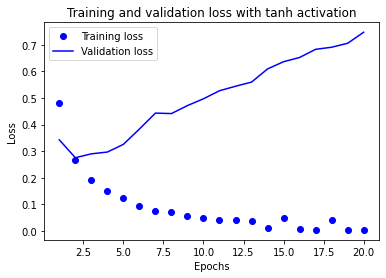

In [38]:
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss with tanh activation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("images/movies/7.png", dpi=1200, bbox_inches="tight")

plt.show()